In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Lokeshrajkp/Placement-Assignment_Lokeshraj-K-P/main/Machine%20learning/instagram_reach.csv')

In [ ]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [ ]:
df.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


In [ ]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [ ]:
# No null values found

In [ ]:
df.duplicated().sum()

0

In [ ]:
# NO  duplicate records found

In [ ]:
df1=df.copy()

In [ ]:
df1=df1.drop(['Unnamed: 0','S.No'],axis=1)

In [ ]:
df1.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [ ]:
df1['Time since posted']=df1['Time since posted'].str.replace('hours','')


In [ ]:
df1['Time since posted']=df1['Time since posted'].astype('int')

In [ ]:
df1.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [ ]:
df1.rename(columns={'USERNAME':'Username'}, inplace=True)

In [ ]:
df1.head()

,Username,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [ ]:
df1['Hashtags']=df1['Hashtags'].str.replace('#','')

In [ ]:
df1.head()

,Username,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,MachineLearning AI DataAnalytics DataScienc Da...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,deck .mac macintoshsayhello apple stevejobs a...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,whoiswho aitrading ai aitradingteaminstateam i...,2,25
3,opensourcedworkplace,sfad,340,iot creworkplace CDO bigdata technologytech wo...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,instamachinelearning instabigdatainstamarketin...,3,30


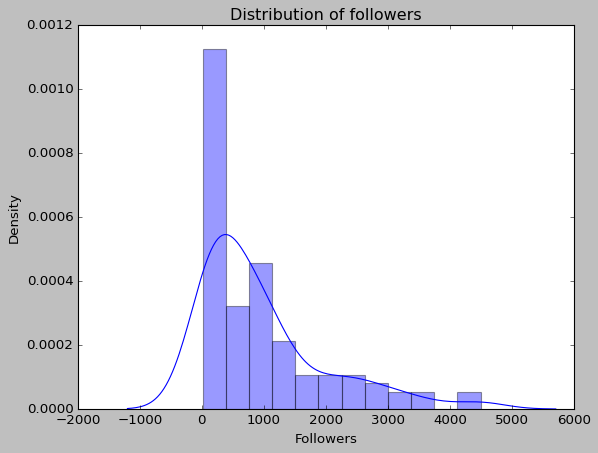

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(df1['Followers'])
plt.title("Distribution of followers")
plt.show()

In [ ]:
# The followers distribution in right skewed. Most of the account has followers between 0-300 or more

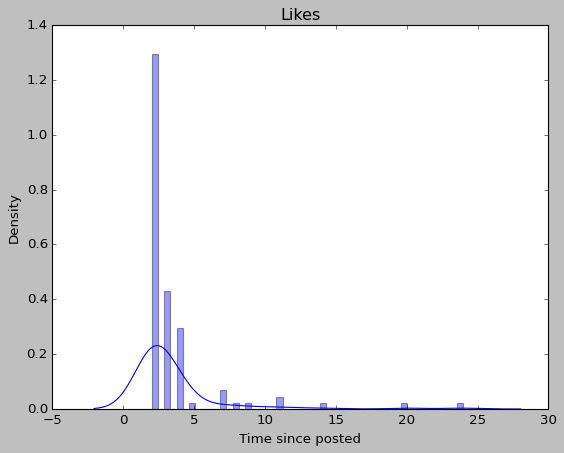

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df1['Time since posted'])
plt.title('Likes')
plt.show()

In [ ]:
#The Time_since_posted_hours distribution is right skewed.
# Most postings are recent

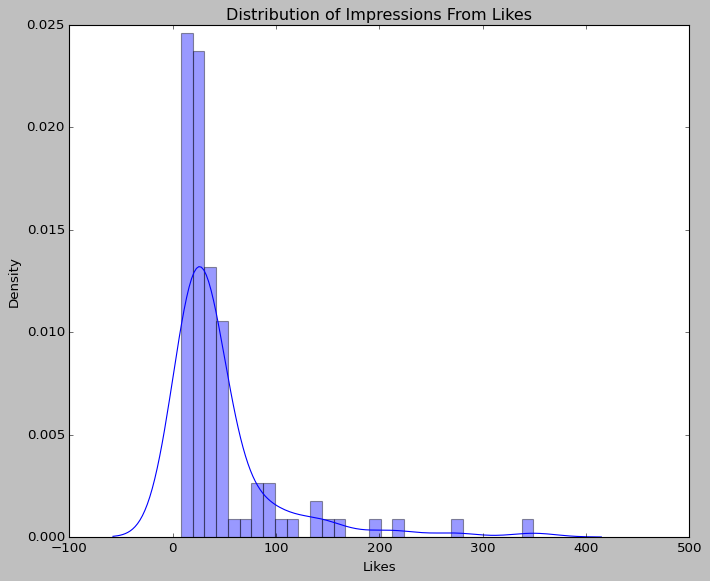

In [ ]:
## Distribution of Likes

plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Likes")
sns.distplot(df1['Likes'])
plt.show()


In [ ]:
print('There are', df1['Username'].nunique(), 'username')

There are 95 username


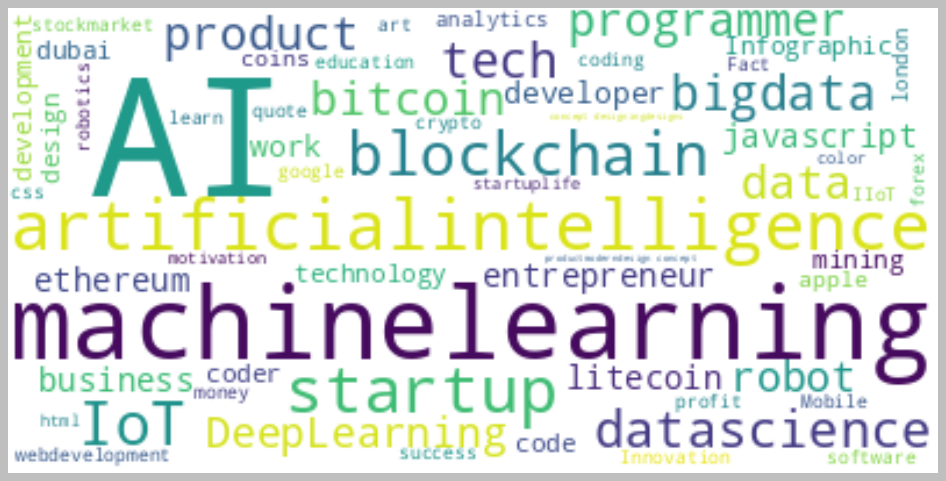

In [ ]:
text = " ".join(i for i in df1.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

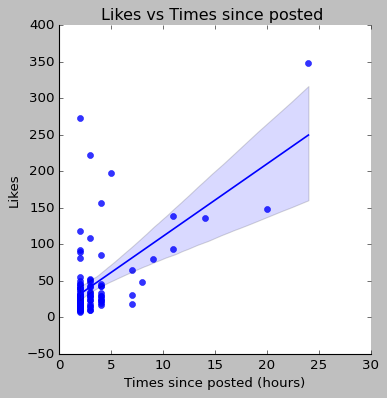

In [ ]:
sns.lmplot(x='Time since posted', y='Likes', data=df1, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()

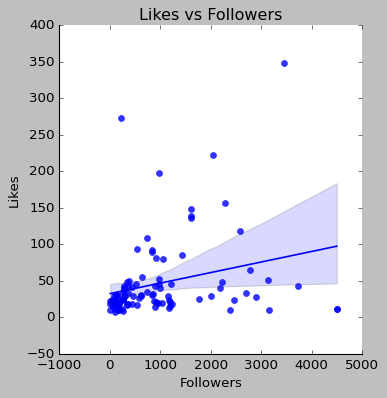

In [ ]:
sns.lmplot(x='Followers', y='Likes', data=df1, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

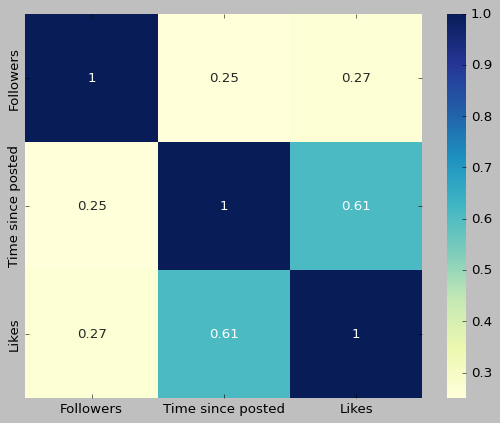

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# There is strong correlation between likes and times since posted in hours

## Predciting Likes(considering Likes as target variable)

In [ ]:
df1.head()

,Username,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,MachineLearning AI DataAnalytics DataScienc Da...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,deck .mac macintoshsayhello apple stevejobs a...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,whoiswho aitrading ai aitradingteaminstateam i...,2,25
3,opensourcedworkplace,sfad,340,iot creworkplace CDO bigdata technologytech wo...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,instamachinelearning instabigdatainstamarketin...,3,30


In [ ]:
# dependent & independent featurs
X=df1[['Followers','Time since posted']]
y=df1['Likes']


In [ ]:
X

,Followers,Time since posted
0,1600,11
1,880,2
2,255,2
3,340,3
4,304,3
...,...,...
95,614,3
96,450,3
97,182,3
98,2039,3


In [ ]:
y

0     139
1      23
2      25
3      49
4      30
     ... 
95     31
96     42
97     10
98    222
99    109
Name: Likes, Length: 100, dtype: int64

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
X_train.shape,y_train.shape

((70, 2), (70,))

In [ ]:
X_test.shape,y_test.shape

((30, 2), (30,))

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

## Create Functions for model training and evaluation

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
    

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2= evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2= evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 47.3277
- Mean Absolute Error: 27.8336
- R2 Score: 0.1150
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 36.7655
- Mean Absolute Error: 22.5224
- R2 Score: 0.6699


Lasso
Model performance for Training set
- Root Mean Squared Error: 47.3294
- Mean Absolute Error: 27.8392
- R2 Score: 0.1149
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 37.2743
- Mean Absolute Error: 22.6926
- R2 Score: 0.6607


Ridge
Model performance for Training set
- Root Mean Squared Error: 47.3277
- Mean Absolute Error: 27.8341
- R2 Score: 0.1150
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 36.8117
- Mean Absolute Error: 22.5379
- R2 Score: 0.6691


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 42.7688
- Mean Absolute Error: 26.7543
- R2 Score: 0.2773
---------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.669884
2,Ridge,0.669056
1,Lasso,0.660686
5,Random Forest Regressor,0.307303
7,CatBoosting Regressor,0.260066
8,AdaBoost Regressor,0.178321
6,XGBRegressor,0.095803
4,Decision Tree,0.075442
3,K-Neighbors Regressor,0.001157


## Linear Regression performed good

In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 66.99


*  Accuracy of the model is 88.04

## Plot y_pred and y_test

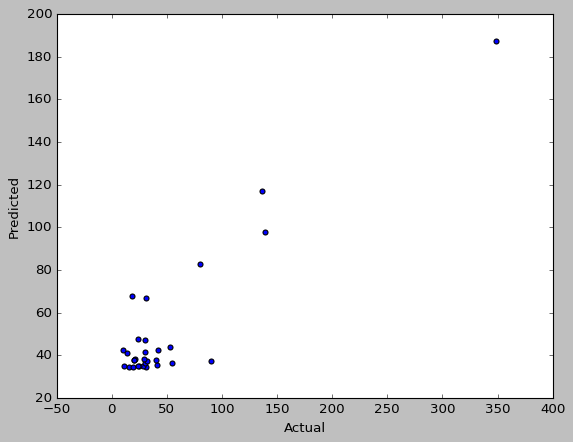

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

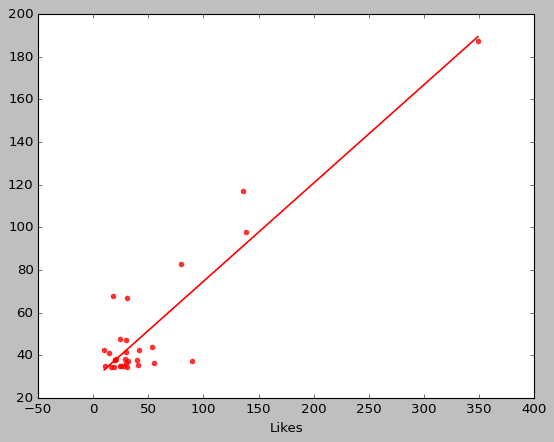

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

* #### Difference between Actual and Predicted Values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
83,14,41.036999,-27.036999
53,24,47.435218,-23.435218
70,21,38.503455,-17.503455
45,31,34.733212,-3.733212
44,16,34.719222,-18.719222
39,136,116.848933,19.151067
22,20,37.947362,-17.947362
80,28,34.796166,-6.796166
10,31,66.888685,-35.888685
0,139,97.612308,41.387692


--------------------------------------------------------------------------------------------------------------------------------------*******************---------------------------------------------------------------------------------------

# Predciting Time since posted(considering Time since posted as target variable)

In [340]:
df1.head()

,Username,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,MachineLearning AI DataAnalytics DataScienc Da...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,deck .mac macintoshsayhello apple stevejobs a...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,whoiswho aitrading ai aitradingteaminstateam i...,2,25
3,opensourcedworkplace,sfad,340,iot creworkplace CDO bigdata technologytech wo...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,instamachinelearning instabigdatainstamarketin...,3,30


In [341]:
# dependent & independent featurs
X=df1[['Followers','Likes']]
y=df1['Time since posted']


In [343]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [344]:
X_train.shape,y_train.shape

((70, 2), (70,))

In [345]:
X_test.shape,y_test.shape

((30, 2), (30,))

In [346]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [347]:
X_test_scaled=scaler.transform(X_test)

In [351]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
    

In [352]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2= evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2= evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.3773
- Mean Absolute Error: 1.2534
- R2 Score: 0.1152
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8788
- Mean Absolute Error: 2.1134
- R2 Score: 0.3222


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.3773
- Mean Absolute Error: 1.2525
- R2 Score: 0.1151
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8996
- Mean Absolute Error: 2.1220
- R2 Score: 0.3149


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.3773
- Mean Absolute Error: 1.2534
- R2 Score: 0.1152
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8788
- Mean Absolute Error: 2.1134
- R2 Score: 0.3222


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.1310
- Mean Absolute Error: 1.0543
- R2 Score: 0.2890
-----------------------

In [353]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.322168
2,Ridge,0.322166
1,Lasso,0.314859
5,Random Forest Regressor,0.238319
3,K-Neighbors Regressor,0.094173
7,CatBoosting Regressor,0.013877
8,AdaBoost Regressor,0.001630
6,XGBRegressor,-0.041282
4,Decision Tree,-0.076792


## Linear Regression performed good

In [354]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 32.22


## Plot y_pred and y_test

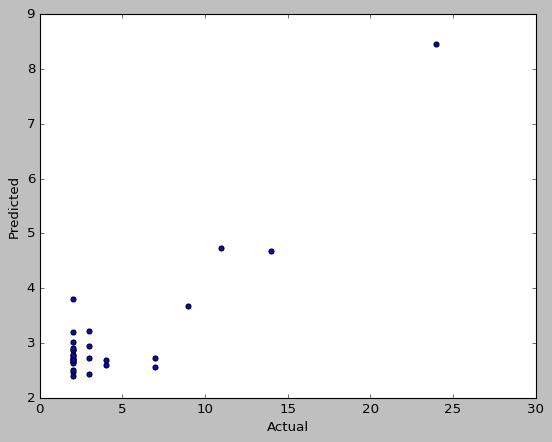

In [355]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

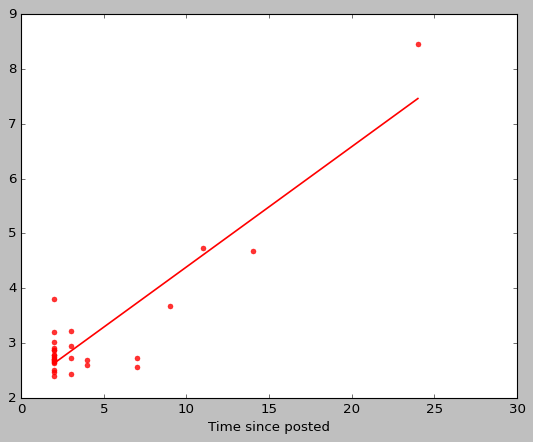

In [356]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

* #### Difference between Actual and Predicted Values

In [358]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
83,3,2.438451,0.561549
53,4,2.599520,1.400480
70,2,2.749479,-0.749479
45,2,2.719010,-0.719010
44,2,2.475623,-0.475623
39,14,4.681316,9.318684
22,2,2.704945,-0.704945
80,2,2.673685,-0.673685
10,7,2.723825,4.276175
0,11,4.729851,6.270149
